## Simulation of Planetary Orbits

In this notebook, we simulate the orbit of a planet around a massive star.

For simplicity, we assume the mass of the planet is significantly less than the mass of the parent star, so the star can be thought to be stationary. The only object in motion in our model is the planet.

By *Newton's law of gravitation*, the equation of motion for the planet reads:
$$ \mathbf{a} = -\frac{GM}{r^3} \mathbf{r} $$

Also, when the gravitational field is not insanely strong, *Einstein's theory of general relativity* suggests a correction term proportional to $r^{-4}$ to the force, so the equation of motion can be written as:
$$ \mathbf{a} = - \left( \frac{GM}{r^3} + \alpha\frac{GM}{r^5} \right) \mathbf{r}$$

Given the initial conditions for the planet's velocity and position, then we can predict the motion of this planet at any time $t$ by solving this differential equation of motion.

If the effects due to general relativity is negligible, the planet will revolve around the star in a **closed elliptical** orbit. However, the additional correction term will predict an overall rotation of orbit over time, known as the **precession** of planetary orbits.

### Brief outline for finding a numerical solution

We here give a sketchy outline about how to find the numerical solution to $\mathbf{r}(t)$ at any time $t$.

By splitting the continuous time into very short discrete steps, we can break down the differential equation into a difference equation. In particular, suppose the velocity and the position at time $t$ are known, then we have for time $t+\Delta t$:

$$ \mathbf{v}(t+\Delta t) \approx \mathbf{v}(t) + \mathbf{a}(t) \Delta t \\
\mathbf{r}(t+\Delta t) \approx \mathbf{r}(t) + \mathbf{v}(t) \Delta t $$

It can be shown that the planetary orbit lies in a 2D plane, say the $xy$-plane. Then the $x$- and $y$-components can be dealt with separately. By repeatedly extrapolating $x$ and $y$ step by step, the position $(x, y)$ of the planet can be evaluated for any time $t$, and this allows a plot for the planetary orbit.

### A few words on the implementation

For simplicity, I have taken the natural units with $G=1$ so the plot for the planetary orbit should be viewed as a scaled diagram. The plot has the right shape for the orbit, but the coordinate values can only be understood as relative values.

In the implementation below, we have adopted a *mid-point correction* scheme, so that the accuracy of the algorithm is improved to a higher order.

Also, I have made $\alpha$ an adjustable parameter in the plotting function. Although $\alpha$, the strength of the relativistic effect, can be given by a precise formula, making the parameter $\alpha$ flexible means the correction due to general relativity can be turned on or off as we wish. Tuning the value of $\alpha$ leads to the effect of faster or slower precession, as you can check out with the codes below.

Setting $\alpha = 0$ reduces the model to the classical Newtonian two-body problem, which should describe a closed elliptical orbit (as long as we do not initialise the motion with crazy velocities). This serves as a nice test for the reliability of our numerical methods, and you shall see that the orbit generated by the codes does close on itself even after quite several revolutions, demonstrating a pretty good accuracy of our numerical methods.

In [1]:
# import libraries
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# initialize independent variable t for time
# you may change the grid scales and spacings and check out the outcomes
t_min = 0
t_max = 100
n = 10000
dt = (t_max - t_min)/n

t = np.linspace(t_min, t_max, n)

In [3]:
# numerical solution for the planetary orbits
def orbit(M, alpha, t, initial_cons):
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    
    # imposing initial conditions
    x[0] = initial_cons[0]
    y[0] = initial_cons[1]
    vx[0] = initial_cons[2]
    vy[0] = initial_cons[3]
    
    # implementing the extrapolation scheme
    for i in range(1, len(t)):
        r = ( x[i-1]**2 + y[i-1]**2 )**0.5
        ax = - M * x[i-1] * (1/r**3 + alpha/r**5)
        ay = - M * y[i-1] * (1/r**3 + alpha/r**5)
        vx_mid = vx[i-1] + ax * dt/2
        vy_mid = vy[i-1] + ay * dt/2
        x[i] = x[i-1] + vx_mid * dt
        y[i] = y[i-1] + vy_mid * dt
        x_mid = (x[i] + x[i-1])/2
        y_mid = (y[i] + y[i-1])/2
        r_mid = ( x_mid**2 + y_mid**2 )**0.5
        ax_mid = - M * x_mid * (1/r_mid**3 + alpha/r_mid**5)
        ay_mid = - M * y_mid * (1/r_mid**3 + alpha/r_mid**5)
        vx[i] = vx[i-1] + ax_mid * dt
        vy[i] = vy[i-1] + ay_mid * dt
    
    return [x, y]

In [4]:
# plotting the planetary orbit
def plot_orbit(M, alpha, t, initial_cons):
    R = orbit(M, alpha, t, initial_cons)
    plt.plot(R[0], R[1])
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.ylabel('$x$')
    plt.xlabel('$y$')
    plt.show()

In [5]:
# set up initial conditions
x0 = 5
y0 = 0
vx0 = 0
vy0 = 1.2

M = 10
alpha = 0.8
initial_cons = [x0, y0, vx0, vy0]

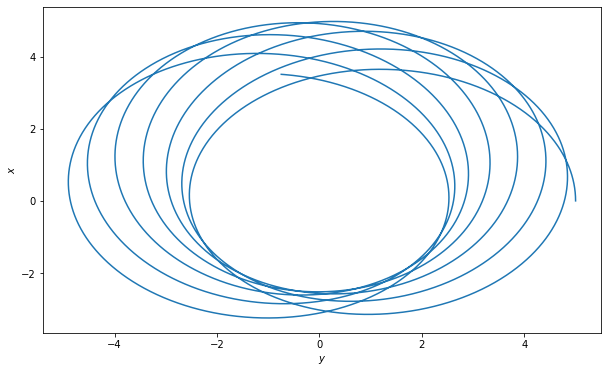

In [8]:
# generate the planetary orbit
plot_orbit(M, alpha, t, initial_cons)

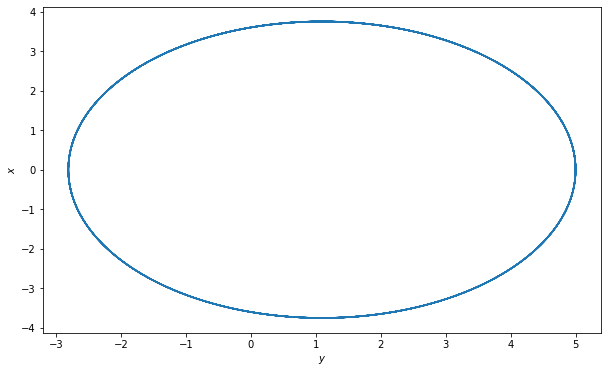

In [7]:
# setting alpha to 0
# checking if the orbit closes on itself
plot_orbit(M, 0, t, initial_cons)